In [ ]:
!pip install tweepy
import tweepy
#Authentication information
consumer_key = "1KZ0ayrkPwAubNqDLF5wMOaYq"
consumer_secret = "R6KIFe8qXPSlAOQAhEVs136JbQL9647mWmX2oDBuO1w6KyeQHC"
access_token= "1486736739192356865-aiHfKTHurqcBfmdfAFSy8gqiseJzbZ"
access_secret = "T5aIhj98io9WOeHL1a6nLuOqnG1fA1lrgVrYFQB5batuJ"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify= True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
subway_tweets = tweepy.Cursor(api.search,q = "#subway -filter:retweets",lang = "en", show_user = True,tweet_mode="extended").items(1000)
subway_tweets_list = [[tweet.created_at, tweet.place, tweet.user.name, tweet.full_text] for tweet in subway_tweets]
print(len(subway_tweets_list))

435


In [ ]:
#convert the list into dataframe
import pandas as pd
tweets_df = pd.DataFrame(subway_tweets_list)
#rename the columns
tweets_df.columns = ['Created at', 'Place', 'User', 'Text']
#save the dataframe as a csv
# tweets_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Super_Bowl_Twitter/data_frame_twitter.csv'))
#The file saved above can be read as follows
# tweets_df = pd.read_csv("C:/Users/.../Corona_tweets.csv", index_col = 0)

Hashtag Analysis (Before further text clean-up)


In [ ]:
# I need to clean up/delete the tweets that are not about the restuarant subway. 
# Looking through the tweets, most confusion arises from reference to the NY Subway, subway 'surfing', or 'fights'
# I will look through each tweet and delete the row if one of these words are in the strings: NY, NYC, 'surfing', 'fight'

print(tweets_df.shape)
bad_word_list = ['NY', 'NYC', 'nyc', 'surfing','surfers', 'surfer','fight', '#AuthorsofTwitter', '#nyc', '#mystery','#NYCsubway','riding', 'cars', 'train', '#train', 'Boston'
                 '#newyorkcity', 'crime', '#crime', 'station', 'ticket', '#NewYork', '#Station', 'urban', 'cleaned']

# list without hashtags since they get deleted later...
# bad_word_list = ['NY', 'NYC', 'nyc', 'surfing','surfers', 'surfer','fight', 'AuthorsofTwitter', 'mystery','NYCsubway','riding', 'cars', 'train', 
#                  'newyorkcity', 'crime', '#crime', 'station', 'ticket', 'NewYork', '#Station', 'urban', 'cleaned', 'ubway']

print(type(bad_word_list[0]))
deleted_count = 0



(435, 4)
<class 'str'>


In [ ]:
import re
def find_hashtags(tweet):
    #This function extracts hashtags from the tweets.
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
  
tweets_df['hashtags'] = tweets_df.Text.apply(find_hashtags)

hashtag_list = tweets_df['hashtags'].to_list()
flat_hashtags_df = pd.DataFrame([item for sublist in hashtag_list for item in sublist])
flat_hashtags_df.shape
#change the name of the column to hashtags
flat_hashtags_df.columns = ['hashtags']
flat_hashtags_df.head(50)

,hashtags
0,#subway
1,#giftcards
2,#giftcardsale
3,#bitcoin
4,#BTC
5,#crypto
6,#Cryptonews
7,#cryptocommunity
8,#dogecoin
9,#DOGE


Total hashtags:  2283
Repeated hashtags:  1265


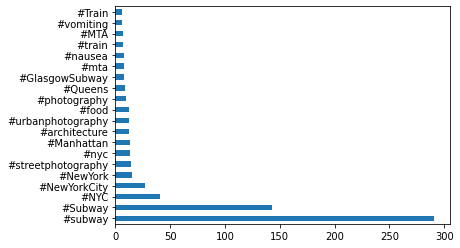

In [ ]:
print("Total hashtags: ", len(flat_hashtags_df['hashtags']))
print("Repeated hashtags: ", len(flat_hashtags_df['hashtags'].unique()))

import matplotlib.pyplot as plt
flat_hashtags_df['hashtags'].value_counts()[:20].plot(kind='barh')

In [ ]:
tweets_df

In [ ]:
# Clean up hashtags and other weird charcters
#define a function to clean up the tweets. input - text field of all #the rows, output - cleaned text 
def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)   #add this back if ubway is not ready
    # Remove hashtags
    # txt = re.sub(r'#[A-Z0-9]+', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    #remove amp
    txt = re.sub(r'&amp;', '', txt)
    #rempve strange characters
    txt = re.sub(r'ðŸ™', '', txt)
    #remove new lines
    txt = re.sub(r'\n', ' ', txt)
    return txt
tweets_df['Cleaned_Text'] = tweets_df['Text'].apply(cleanUpTweet)

In [ ]:
deleted_count = 0
i = 0
row_count = 0

for tweet in tweets_df['Cleaned_Text'] :
  tweet_list = tweet.split()
  i = 0

  while i < len(tweet_list) :
    if tweet_list[i] in bad_word_list :
      print(str(row_count), tweet_list[i])
      try : 
        tweets_df = tweets_df.drop(row_count)
        # print("need to delete row ", row_count, 'length of df is: ', len(tweets_df))
        deleted_count += 1
      except :
        print('Could not remove' 'length of df is: ', len(tweets_df))
      i = len(tweet_list)
    i += 1
  row_count += 1
  # print(tweet)

  # while i < len(bad_word_list):
  #   row_count += 1
  #   if bad_word_list[i] in tweet:
  #     tweets_df = tweets_df.drop(tweets_df.index[row_count])
  #     deleted_count += 1
  #   i += 1
print('removed: ', deleted_count)
print(tweets_df.shape)

3 NYC
5 #NewYork
11 #train
20 station
21 NYC
22 NYC
30 train
32 NYC
36 #NewYork
37 #NewYork
38 #NewYork
39 #NewYork
40 train
42 cars
62 #train
65 #train
66 station
82 #nyc
85 NYC
90 #train
96 train
99 #NewYork
108 #nyc
118 train
125 #nyc
138 train
144 train
145 NYC
152 ticket
153 #nyc
168 station
171 station
173 #nyc
177 #nyc
191 NYC
195 station
197 #NewYork
203 train
205 #NewYork
209 NYC
211 train
220 #train
244 NYC
246 #nyc
250 #NewYork
257 #NewYork
261 NYC
270 NYC
277 train
282 #NewYork
299 station
305 #NewYork
316 surfer
332 #NewYork
335 train
343 ticket
351 #train
354 surfers
364 cleaned
365 #Station
376 fight
377 #NewYork
382 train
386 NYC
388 NYC
392 #nyc
407 train
418 cars
424 fight
removed:  69
(366, 6)


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
for index, row in tweets_df['Text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    if score['neg'] > score['pos']:
        tweets_df.loc[index, "Sentiment"] = "negative"
    elif score['pos'] > score['neg']:
        tweets_df.loc[index, "Sentiment"] = "positive"
    else:
        tweets_df.loc[index, "Sentiment"] = "neutral"
        
    tweets_df.loc[index, 'neg'] = score['neg']
    tweets_df.loc[index, 'neu'] = score['neu']
    tweets_df.loc[index, 'pos'] = score['pos']
    tweets_df.loc[index, 'compound'] = score['compound']
    
tweets_df.head(10)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Created at,Place,User,Text,hashtags,Cleaned_Text,Sentiment,neg,neu,pos,compound
0,2022-07-25 18:29:28,None,Piggy.Cards,Want to save on your subs? Shop our Subway gif...,"[#subway, #giftcards, #giftcardsale, #bitcoin,...",Want to save on your subs? Shop our Subway gif...,positive,0.000,0.727,0.273,0.8718
1,2022-07-25 18:09:54,None,Tim Hughes 提姆·休斯,Kingsway tram tunnel #Holborn #kingsway @secre...,"[#Holborn, #kingsway, #tram, #tunnel, #subway,...",Kingsway tram tunnel #Holborn #kingsway .londo...,neutral,0.000,1.000,0.000,0.0000
2,2022-07-25 18:05:03,None,Digi-Key Electronics,"Frank Sprague -July 25, 1857 🧁🎂🥳 - ""the father...",[#subway],"Frank Sprague -July 25, 1857 🧁🎂🥳 - ""the father...",neutral,0.000,1.000,0.000,0.0000
4,2022-07-25 17:05:00,None,UberEatsScam,"Are you aware of the .@SubwayUK #scam, DO NOT ...","[#scam, #Subway, #customerexperience, #news, #...","Are you aware of the . #scam, DO NOT ORDER #Su...",neutral,0.000,1.000,0.000,0.0000
6,2022-07-25 16:33:20,None,Swansgate Centre,😍👇Calling all @subwayuk lovers! Subway has an ...,"[#SubwaySeriesMenu, #subway, #subwaylovers, #s...",😍👇Calling all lovers! Subway has an ALL-NEW #...,positive,0.000,0.757,0.243,0.8264
7,2022-07-25 15:17:01,None,GlasgowSubway,Think you don't use the Subway enough to get a...,"[#Subway, #GlasgowSubway, #Glasgow, #SubwayTra...",Think you don't use the Subway enough to get a...,neutral,0.000,1.000,0.000,0.0000
8,2022-07-25 15:03:00,None,UberEatsScam,Be aware of .@SubwayUK #scam in partnership wi...,"[#scam, #Subway, #Subway, #CustomerService, #c...","Be aware of . #scam in partnership with , DO N...",positive,0.033,0.909,0.058,0.2732
9,2022-07-25 15:01:51,None,Nzuri Sana,"Hey @SUBWAY I'm eating in Wolfville, NS. Best ...",[#Subway],"Hey I'm eating in Wolfville, NS. Best atmosph...",negative,0.157,0.768,0.075,-0.3781
10,2022-07-25 14:55:25,None,Thoughts Uncensored,@nypost You getting a tattoo for the free sand...,[#subway],You getting a tattoo for the free sandwiches ...,positive,0.000,0.743,0.257,0.8652
12,2022-07-25 13:01:10,None,JCP in Central Scotland,Coachbuilder in #Glasgow with @GlasgowSubway \...,"[#Glasgow, #GlasgowJobs, #Subway, #Underground]",Coachbuilder in #Glasgow with Closing: 31st...,neutral,0.000,1.000,0.000,0.0000


In [ ]:
#create new data frames for all sentiments
tweet_neg = tweets_df[tweets_df["Sentiment"] == "negative"]
tweet_neu = tweets_df[tweets_df["Sentiment"] == "neutral"]
tweet_pos = tweets_df[tweets_df["Sentiment"] == "positive"]
#function for calculating the percentage of all the sentiments
def calc_percentage(x,y):
    return x/y * 100
pos_per = calc_percentage(len(tweet_pos), len(tweets_df))
neg_per = calc_percentage(len(tweet_neg), len(tweets_df))
neu_per = calc_percentage(len(tweet_neu), len(tweets_df))
print("positive: {} {}%".format(len(tweet_pos),  format(pos_per, '.1f')))
print("negative: {} {}%".format(len(tweet_neg), format(neg_per, '.1f')))
print("neutral: {} {}%".format(len(tweet_neu), format(neu_per, '.1f'))) 
format(calc_percentage(len(tweet_neu), len(tweets_df)), '.1f')

positive: 137 37.4%
negative: 97 26.5%
neutral: 132 36.1%


'36.1'

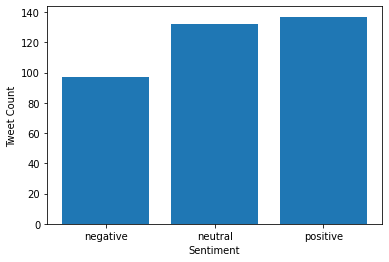

In [ ]:
#create a bar graph by sentiment
import matplotlib.pyplot as plt
labels = tweets_df.groupby('Sentiment').count().index.values
values = tweets_df.groupby('Sentiment').size().values

plt.bar(labels, values)
plt.xlabel("Sentiment")
 
# Label for y-axis
plt.ylabel("Tweet Count")
plt.show()

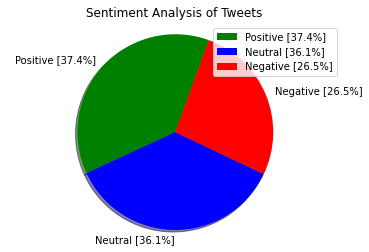

In [ ]:
labels = ['Positive ['+format(pos_per, '.1f')+'%]', 'Neutral ['+format(neu_per,'.1f')+'%]', 'Negative ['+format(neg_per,'.1f')+'%]']
sizes = [len(tweet_pos), len(tweet_neu), len(tweet_neg)]
colors = ['green', 'blue', 'red']
patches, texts = plt.pie(sizes, labels = labels, colors = colors,shadow = True, startangle = 70)
plt.legend(labels)
plt.title("Sentiment Analysis of Tweets")
plt.axis('equal')
plt.show()

Positive word cloud


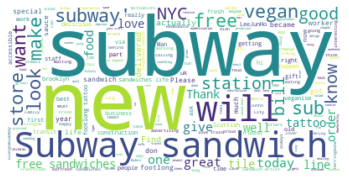


Negative word cloud


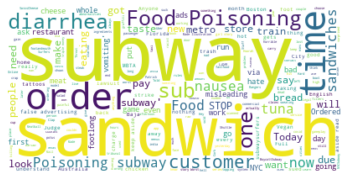

In [ ]:
from wordcloud import WordCloud, STOPWORDS
#function to create word cloud
def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color = "white", max_words = 3000, stopwords = stopwords, repeat = True)
    wc.generate(str(text))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
#word cloud for positive sentiments
print('Positive word cloud')
create_wordcloud(tweet_pos["Cleaned_Text"].values)
print('')
print('Negative word cloud')
#wordcloud for negative sentimenst
create_wordcloud(tweet_neg["Cleaned_Text"].values)

In [ ]:
import nltk
nltk.download('stopwords')


def tokenization(text):
    text = re.split('\W+', text)
    return text
tweets_df['tokenized'] = tweets_df['Cleaned_Text'].apply(lambda x: tokenization(x.lower()))
#Removing Stop words
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
tweets_df['nonstop'] = tweets_df['tokenized'].apply(lambda x:remove_stopwords(x))
#Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tweets_df['stemmed'] = tweets_df['nonstop'].apply(lambda x: stemming(x))
#join all the words to make a final text field
tweets_df['final'] = tweets_df['stemmed'].apply(lambda x: ' '.join(x))
tweets_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Created at,Place,User,Text,hashtags,Cleaned_Text,Sentiment,neg,neu,pos,compound,tokenized,nonstop,stemmed,final
0,2022-07-25 18:29:28,None,Piggy.Cards,Want to save on your subs? Shop our Subway gif...,"[#subway, #giftcards, #giftcardsale, #bitcoin,...",Want to save on your subs? Shop our Subway gif...,positive,0.0,0.727,0.273,0.8718,"[want, to, save, on, your, subs, shop, our, su...","[want, save, subs, shop, subway, gift, cards, ...","[want, save, sub, shop, subway, gift, card, sa...",want save sub shop subway gift card save 3 82 ...
1,2022-07-25 18:09:54,None,Tim Hughes 提姆·休斯,Kingsway tram tunnel #Holborn #kingsway @secre...,"[#Holborn, #kingsway, #tram, #tunnel, #subway,...",Kingsway tram tunnel #Holborn #kingsway .londo...,neutral,0.0,1.000,0.000,0.0000,"[kingsway, tram, tunnel, holborn, kingsway, lo...","[kingsway, tram, tunnel, holborn, kingsway, lo...","[kingsway, tram, tunnel, holborn, kingsway, lo...",kingsway tram tunnel holborn kingsway london t...
2,2022-07-25 18:05:03,None,Digi-Key Electronics,"Frank Sprague -July 25, 1857 🧁🎂🥳 - ""the father...",[#subway],"Frank Sprague -July 25, 1857 🧁🎂🥳 - ""the father...",neutral,0.0,1.000,0.000,0.0000,"[frank, sprague, july, 25, 1857, the, father, ...","[frank, sprague, july, 25, 1857, father, elect...","[frank, spragu, juli, 25, 1857, father, electr...",frank spragu juli 25 1857 father electr railwa...
4,2022-07-25 17:05:00,None,UberEatsScam,"Are you aware of the .@SubwayUK #scam, DO NOT ...","[#scam, #Subway, #customerexperience, #news, #...","Are you aware of the . #scam, DO NOT ORDER #Su...",neutral,0.0,1.000,0.000,0.0000,"[are, you, aware, of, the, scam, do, not, orde...","[aware, scam, order, subway, falsely, advertis...","[awar, scam, order, subway, fals, advertis, it...",awar scam order subway fals advertis item food...
6,2022-07-25 16:33:20,None,Swansgate Centre,😍👇Calling all @subwayuk lovers! Subway has an ...,"[#SubwaySeriesMenu, #subway, #subwaylovers, #s...",😍👇Calling all lovers! Subway has an ALL-NEW #...,positive,0.0,0.757,0.243,0.8264,"[, calling, all, lovers, subway, has, an, all,...","[, calling, lovers, subway, new, subwayseriesm...","[, call, lover, subway, new, subwayseriesmenu,...",call lover subway new subwayseriesmenu 12 new...


In [ ]:
def tokenization(text):
    text = re.split('\W+', text)
    return text
tweet_neg['tokenized'] = tweet_neg["Cleaned_Text"].apply(lambda x: tokenization(x.lower()))
#Removing Stop words
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
tweet_neg['nonstop'] = tweet_neg['tokenized'].apply(lambda x:remove_stopwords(x))
#Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tweet_neg['stemmed'] = tweet_neg['nonstop'].apply(lambda x: stemming(x))
#join all the words to make a final text field
tweet_neg['final'] = tweet_neg['stemmed'].apply(lambda x: ' '.join(x))
tweet_neg.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,Created at,Place,User,Text,hashtags,Cleaned_Text,Sentiment,neg,neu,pos,compound,tokenized,nonstop,stemmed,final
9,2022-07-25 15:01:51,None,Nzuri Sana,"Hey @SUBWAY I'm eating in Wolfville, NS. Best ...",[#Subway],"Hey I'm eating in Wolfville, NS. Best atmosph...",negative,0.157,0.768,0.075,-0.3781,"[hey, i, m, eating, in, wolfville, ns, best, a...","[hey, eating, wolfville, ns, best, atmosphere,...","[hey, eat, wolfvil, ns, best, atmospher, furni...",hey eat wolfvil ns best atmospher furnish layo...
16,2022-07-25 11:45:00,None,UberEatsScam,Anyone using .@ubereats_uk to order #Subway fr...,"[#Subway, #SCAM, #food, #ORDER]",Anyone using . to order #Subway from PLEASE S...,negative,0.131,0.773,0.095,-0.4344,"[anyone, using, to, order, subway, from, pleas...","[anyone, using, order, subway, please, stop, s...","[anyon, use, order, subway, pleas, stop, scam,...",anyon use order subway pleas stop scam take tr...
17,2022-07-25 11:29:34,None,Chew Russell,Baja blast ruined all other “Baja” flavored th...,[#subway],Baja blast ruined all other “Baja” flavored th...,negative,0.114,0.886,0.000,-0.2617,"[baja, blast, ruined, all, other, baja, flavor...","[baja, blast, ruined, baja, flavored, things, ...","[baja, blast, ruin, baja, flavor, thing, quit,...",baja blast ruin baja flavor thing quit adverti...
19,2022-07-25 10:56:29,None,NewsOnePlace.com,(Evening Times):#Subway strike to target first...,"[#Subway, #Rangers]",(Evening Times):#Subway strike to target first...,negative,0.108,0.892,0.000,-0.4588,"[, evening, times, subway, strike, to, target,...","[, evening, times, subway, strike, target, fir...","[, even, time, subway, strike, target, first, ...",even time subway strike target first ranger h...
27,2022-07-25 07:08:05,None,UberEatsScam,@SubwayUK @TheLunaCinema Anyone ordering from ...,"[#Subway, #SCAM, #food, #advertising, #ORDER]",Anyone ordering from #Subway () PLEASE STOP ...,negative,0.134,0.769,0.097,-0.4344,"[, anyone, ordering, from, subway, please, sto...","[, anyone, ordering, subway, please, stop, sca...","[, anyon, order, subway, pleas, stop, scam, ta...",anyon order subway pleas stop scam take tripl...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer()
countVector = countVectorizer.fit_transform(tweets_df["final"])
print('{} Number of tweets have {} words'.format(countVector.shape[0], countVector.shape[1]))

count_vect_df = pd.DataFrame(countVector.toarray(), columns = countVectorizer.get_feature_names())
count_vect_df

#most frequently used words in the tweets
counts = pd.DataFrame(count_vect_df.sum())
count_df = counts.sort_values(0, ascending = False).head(10)
count_df



366 Number of tweets have 2390 words


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
subway,492
sandwich,82
get,43
food,35
order,31
new,29
sub,28
like,27
nyc,25
one,23


Text(0.5, 1.0, 'Top 20 Most frequently used words in the tweets')

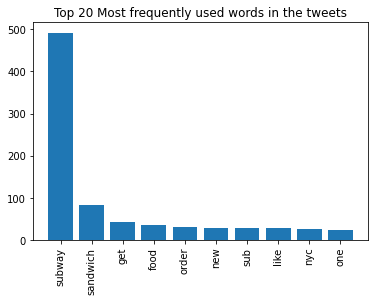

In [ ]:
ind = count_df.index
val = [item for sublist in count_df.values for item in sublist]
plt.bar(ind, val)
plt.xticks(rotation = 90)
plt.title('Top 20 Most frequently used words in the tweets')

In [ ]:
# same dealio, but now for the tweets_neg df
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer()
countVector = countVectorizer.fit_transform(tweet_neg["final"])
print('{} Number of tweets have {} words'.format(countVector.shape[0], countVector.shape[1]))

count_vect_df = pd.DataFrame(countVector.toarray(), columns = countVectorizer.get_feature_names())
count_vect_df

#most frequently used words in the tweets
counts = pd.DataFrame(count_vect_df.sum())
count_df1 = counts.sort_values(0, ascending = False).head(10)
count_df1
# Going to drop the word "Subway", since they all have the word Subway in them
count_df1 = count_df1.tail(9)
count_df1

97 Number of tweets have 850 words


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
sandwich,31
order,18
food,17
time,10
poison,10
sub,9
diarrhea,9
get,9
like,9


([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

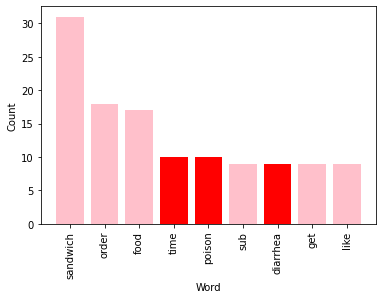

In [ ]:
ind = count_df1.index
val = [item for sublist in count_df1.values for item in sublist]
plt.bar(ind, val, color=['pink', 'pink', 'pink', 'red', 'red', 'pink', 'red'])
# Label for x-axis
plt.xlabel("Word")
 
# Label for y-axis
plt.ylabel("Count")
plt.xticks(rotation = 90)
# plt.title('Top 10 Most Frequently Used Words of Negative Tweets')